In [51]:
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install matplotlib
!pip install pandas

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [6]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [7]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [8]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [9]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [10]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [11]:
num_topics, num_top_words = 6, 8

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [14]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [17]:
vocab = np.array(vectorizer.get_feature_names_out())
vocab.shape

(26576,)

In [18]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype=object)

In [20]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: total: 2min 39s
Wall time: 46.4 s


In [21]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


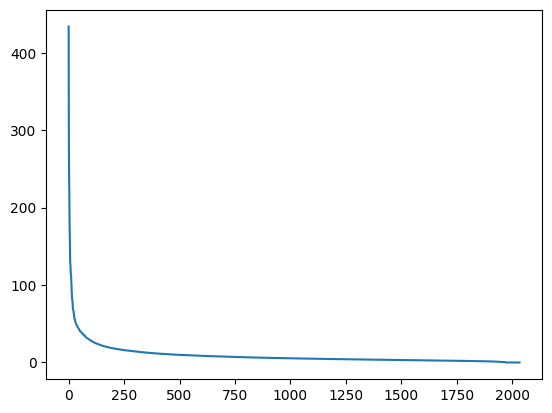

In [23]:
plt.plot(s);

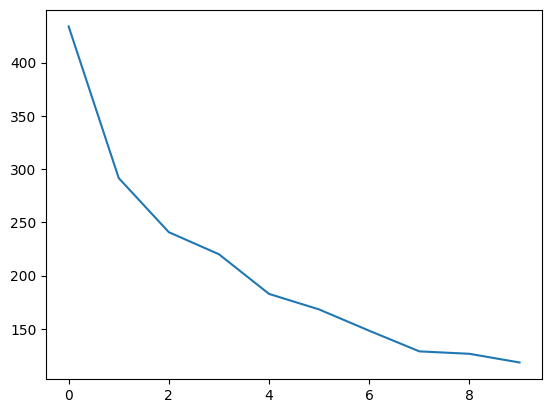

In [24]:
plt.plot(s[:10])

In [25]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [26]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [27]:
m,n=vectors.shape
d=5  # num topics

In [72]:
vectors_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
clf = decomposition.NMF(n_components=d, random_state=1)
vectors_array = np.asarray(vectors)
W1 = clf.fit_transform(vectors_array)
H1 = clf.components_

In [31]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [32]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [33]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [73]:
H1

array([[0.12141852, 0.        , 0.        , ..., 0.00003206, 0.00006412,
        0.00029051],
       [0.11950029, 0.12112562, 0.00016636, ..., 0.00011668, 0.00023336,
        0.05195083],
       [0.05783248, 0.48299838, 0.00080166, ..., 0.00028842, 0.00057683,
        0.        ],
       [0.        , 0.14819091, 0.        , ..., 0.00006596, 0.00013192,
        0.        ],
       [0.12787154, 0.19416377, 0.00050633, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

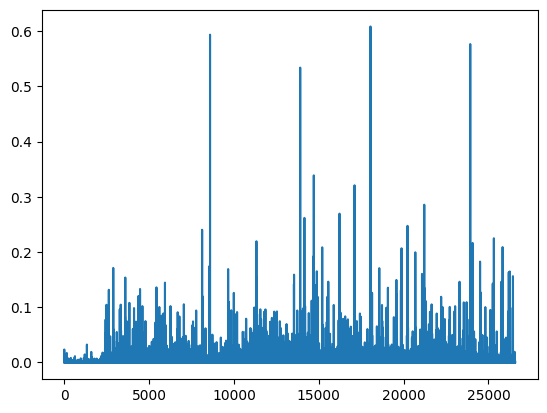

In [35]:
plt.plot(clf.components_[0])

In [36]:
clf.reconstruction_err_

43.71292606348689

In [37]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [39]:

vectors_array = np.asarray(vectors)
W1 = clf.fit_transform(vectors_array)
H1 = clf.components_

In [40]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [41]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

In [42]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

In [43]:
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [44]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [45]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [46]:
report(vectors_tfidf, W, H)

44.42786716220947 6.768735156806365e-07 1.0670361259504231e-07 0 0


In [47]:
upd(vectors_tfidf,W,H,lr)

In [48]:
report(vectors_tfidf, W, H)

44.41985363474713 -0.0008128153688194533 -7.454975642191525e-05 125 328


In [49]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.41391907822037 -0.000903069836528765 -5.595626134000116e-05 128 278
44.375591312241525 -0.0003916168770354913 -7.597599954887019e-05 51 516
44.346931141207094 -0.00018350487369194065 -6.600145741438071e-05 28 936
44.31500454084282 -0.00011011323335689425 -7.838234228095878e-05 26 1510
44.279817861265705 -0.00010534786228757941 -0.00010849930376392658 28 2174


In [50]:
show_topics(H)

['space just don know think people like god',
 'space god people don just think like know',
 'god don space people like think know does',
 'people god space like don just think know',
 'god people space don just think know like']

In [52]:
import pandas as pd
import re

In [70]:
texto = """
1    ONIO PUYOL Presidente de la Federació Catalana de Futbol Arantxa fue la número 1. Indurain, el quinto T **  1995            PRENSA                                   La Vanguardia, 30/12/1995 : ENCUESTA.                        ESPAÑA          05.Deportes                    T.I.S.A (Barcelona), 1995
2    l visto bueno de quienes dirigen los destinos del Futbol Club Barcelona siempre amado y querido por uno **  1995            PRENSA                                   La Vanguardia, 30/03/1995 : CARTAS DE LOS LECTORES.          ESPAÑA          02.Testimonios varios          T.I.S.A (Barcelona), 1995
3    ignos. JULIO GUTIÉRREZ GÓMEZ Socio n.º 30.608 del Futbol Club Barcelona Viladrau CINE IMAX-PORT VELL En **  1995            PRENSA                                   La Vanguardia, 30/03/1995 : CARTAS DE LOS LECTORES.          ESPAÑA          02.Testimonios varios          T.I.S.A (Barcelona), 1995
4    r con José María García y sus retransmisiones de "Futbol en catalá"-, Puyal ya había compaginado esas a **  1995            PRENSA                                   La Vanguardia, 16/03/1995 : J. M. BAGET                      ESPAÑA          04.Medios de comunicación      T.I.S.A (Barcelona), 1995
5     animar al equipo de rugby del USAP y al Perpinyà Futbol Club, que actualmente milita en la segunda div **  1995            PRENSA                                   La Vanguardia, 28/02/1995 : ÓSCAR CABALLERO                  ESPAÑA          05.Deportes                    T.I.S.A (Barcelona), 1995
6    A Director de la Escola Catalana d'Entrenadors de Futbol Para mí, no. Porque el Español tiene la posibi **  1994            PRENSA                                   La Vanguardia, 03/12/1994 : ¿Sería bueno para el RCD Español  ESPAÑA          05.Deportes                    T.I.S.A (Barcelona), 1994
7    AS Vocal de la junta de la Federación Catalana de Futbol Nuestra selección reúne condiciones suficiente **  1994            PRENSA                                   La Vanguardia, 17/06/1994 : ¿Hasta dónde llegará España en e  ESPAÑA          05.Deportes                    T.I.S.A (Barcelona), 1994
8    en este sentido de los colores de la camiseta del Futbol Club Barcelona o en su defecto se añada con ri **  1994            PRENSA                                   La Vanguardia, 04/05/1994 : Reuniones sabatinas frente al Li  ESPAÑA          02.Testimonios varios          T.I.S.A (Barcelona), 1994
9    de Barcelona. 4. En las primeras alineaciones del Futbol Club Barcelona sólo podían jugar ("apartheid") **  1994            PRENSA                                   La Vanguardia, 04/05/1994 : Reuniones sabatinas frente al Li  ESPAÑA          02.Testimonios varios          T.I.S.A (Barcelona), 1994
10   n plena pujanza. Es, claro está, la directiva del Futbol Club Barcelona. IGNASI MOYA. PATRICIO SIMON. E **  1994            PRENSA                                   La Vanguardia, 04/05/1994 : Visiones de la burguesía.        ESPAÑA          02.Sociología                  T.I.S.A (Barcelona), 1994
"""
lineas = texto.split('\n')

# Inicializa una lista para almacenar los datos de cada línea.
datos = []

# Expresión regular para dividir campos por espacios múltiples.
regex = re.compile(r'\s{2,}')

# Recorre las líneas del texto y divide los campos con la expresión regular.
for linea in lineas:
    campos = regex.split(linea.strip())
    if len(campos) > 0:
        datos.append(campos)
#print(datos)
# Reorganiza los campos en columnas con los nombres definidos previamente.
df = pd.DataFrame(datos, columns=["Nº", "CONCORDANCIA", "AÑO", "AUTOR", "TÍTULO", "PAÍS", "TEMA", "PUBLICACIÓN"])

# Muestra el DataFrame.
print(df)

    Nº                                       CONCORDANCIA   AÑO   AUTOR  \
0                                                    None  None    None   
1    1  ONIO PUYOL Presidente de la Federació Catalana...  1995  PRENSA   
2    2  l visto bueno de quienes dirigen los destinos ...  1995  PRENSA   
3    3  ignos. JULIO GUTIÉRREZ GÓMEZ Socio n.º 30.608 ...  1995  PRENSA   
4    4  r con José María García y sus retransmisiones ...  1995  PRENSA   
5    5  animar al equipo de rugby del USAP y al Perpin...  1995  PRENSA   
6    6  A Director de la Escola Catalana d'Entrenadors...  1994  PRENSA   
7    7  AS Vocal de la junta de la Federación Catalana...  1994  PRENSA   
8    8  en este sentido de los colores de la camiseta ...  1994  PRENSA   
9    9  de Barcelona. 4. En las primeras alineaciones ...  1994  PRENSA   
10  10  n plena pujanza. Es, claro está, la directiva ...  1994  PRENSA   
11                                                   None  None    None   

                        